# Credit Card Transactions Fraud Detection

## My Info



#### **Abhishek Baj**
*   **Background**: I graduated with a B.Tech degree in 2016 from an institution in India. Currently, I am in my third quarter as an MSCS student at Drexel.
*   **Skills**: Python, R, tensorflow, Data Analytics
*   **Contributions:** EDA analysis for the proposal.



# Dataset Description

The dataset of study is the Credit Card Transactions Fraud Detection Dataset made available via Kaggle. This dataset emulates credit card transactions, encompassing both legitimate and fraudulent activities, that occurred between January 1, 2019, and December 31, 2020. It covers transactions made by 1000 customers using credit cards from 800 merchants. There are 23 columns and 287015 observations in this dataset. The dataset is well-suited for supervised machine learning algorithms because it includes a target outcome variable, which is essential for training predictive models.

In [34]:
import pandas as pd

fraud_train_df = pd.read_csv('fraudTrain.csv')
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [35]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [36]:
fraud_train_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [4]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# EXPLORATORY DATA ANALYSIS

**General Feature Analysis:** This dataset contains 21 total features along an index column and label column.

**Continuous Feature Distribution Analysis:** There are 9 continuous features not including the index and label column. Features such as transaction date/time (trans_date_trans_time), merchant, category, gender, job, and dob present potential value for the models we create. The address or location columns in this dataset can be dropped as there are continuous latitude and longitude values provided.

In [37]:
num_features = fraud_train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_features)

['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


**Categorical Feature Distribution Analysis:** There are 12 categorical features in the dataset

In [38]:
cat_features = fraud_train_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
(cat_features)

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

['Unnamed: 0',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

**Correlation Analysis**: Correlation analysis on the initial continuous features without any additional data preprocessing shows the 'amt' or amount column having the lone noticeable  correlation to the 'is_fraud' column at 21%. Including encoded categorical columns such as 'category', 'merchant', and 'job' in this analysis should provide valuable correlation insights as well.

In [39]:
corr_matrix = fraud_train_df[num_features].corr()
corr_matrix["is_fraud"].sort_values(ascending=False)

is_fraud      1.000000
amt           0.219404
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num       -0.000981
zip          -0.002162
Unnamed: 0   -0.004767
unix_time    -0.005078
Name: is_fraud, dtype: float64

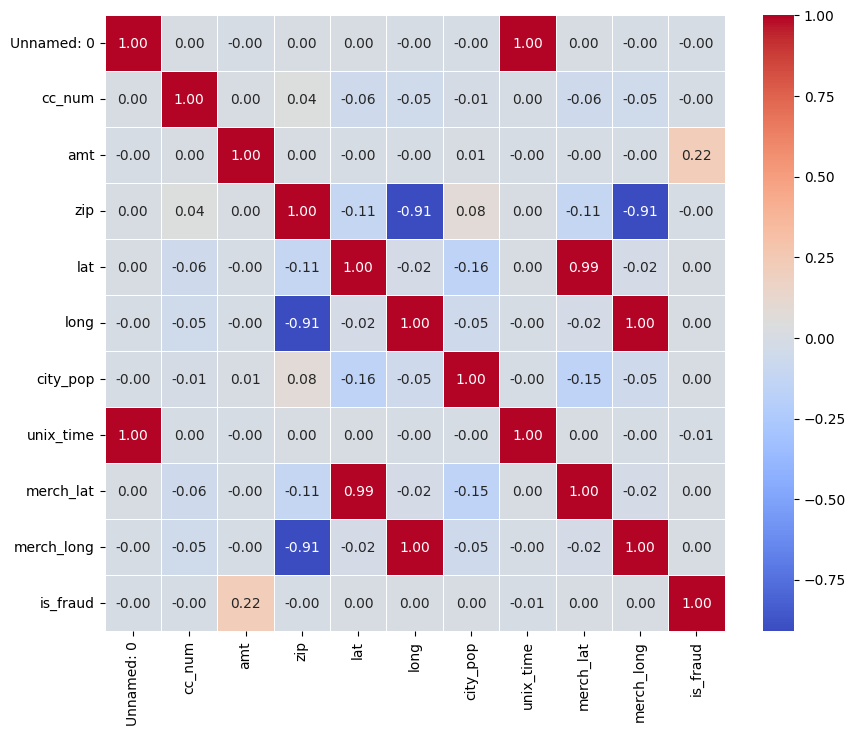

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()

Initial analysis shows that fraudulent purchases tend to stay on the smaller side maxing out at just under 1400 dollars. The largest non-fraudulent purchases go beyond 15000 dollars

In [41]:
pos_fraud = fraud_train_df.loc[fraud_train_df['is_fraud'] == 1]
pos_fraud['amt'].max()

1376.04

In [42]:
non_fraud = fraud_train_df.loc[fraud_train_df['is_fraud'] == 0]
non_fraud['amt'].sort_values()

786894         1.00
145995         1.00
595297         1.00
712554         1.00
1044621        1.00
             ...   
352894     25086.94
606211     26544.12
1234797    27119.77
793677     27390.12
787549     28948.90
Name: amt, Length: 1289169, dtype: float64

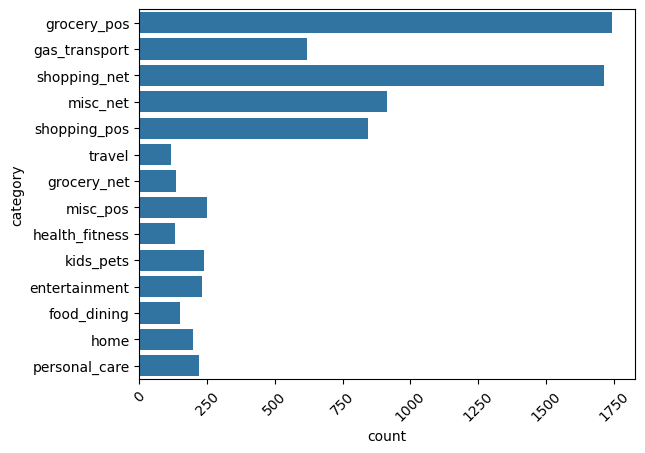

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
total = pd.concat([fraud_train_df])
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
sns.countplot(total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

Analysis shows that most frauds are in grocery_pos and shopping_net features.

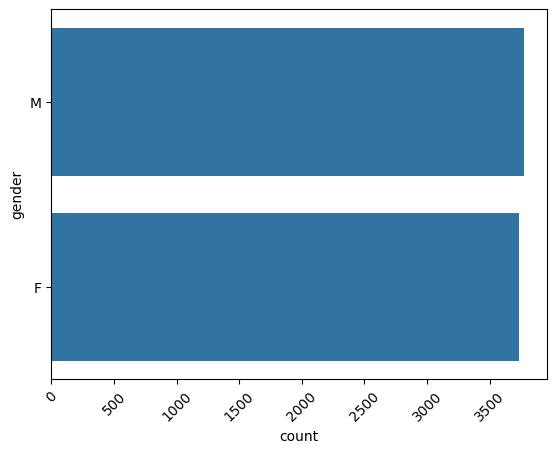

In [44]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

While instances of fraud were slightly higher among male customers, the frequency of such cases is nearly identical for both males and females.

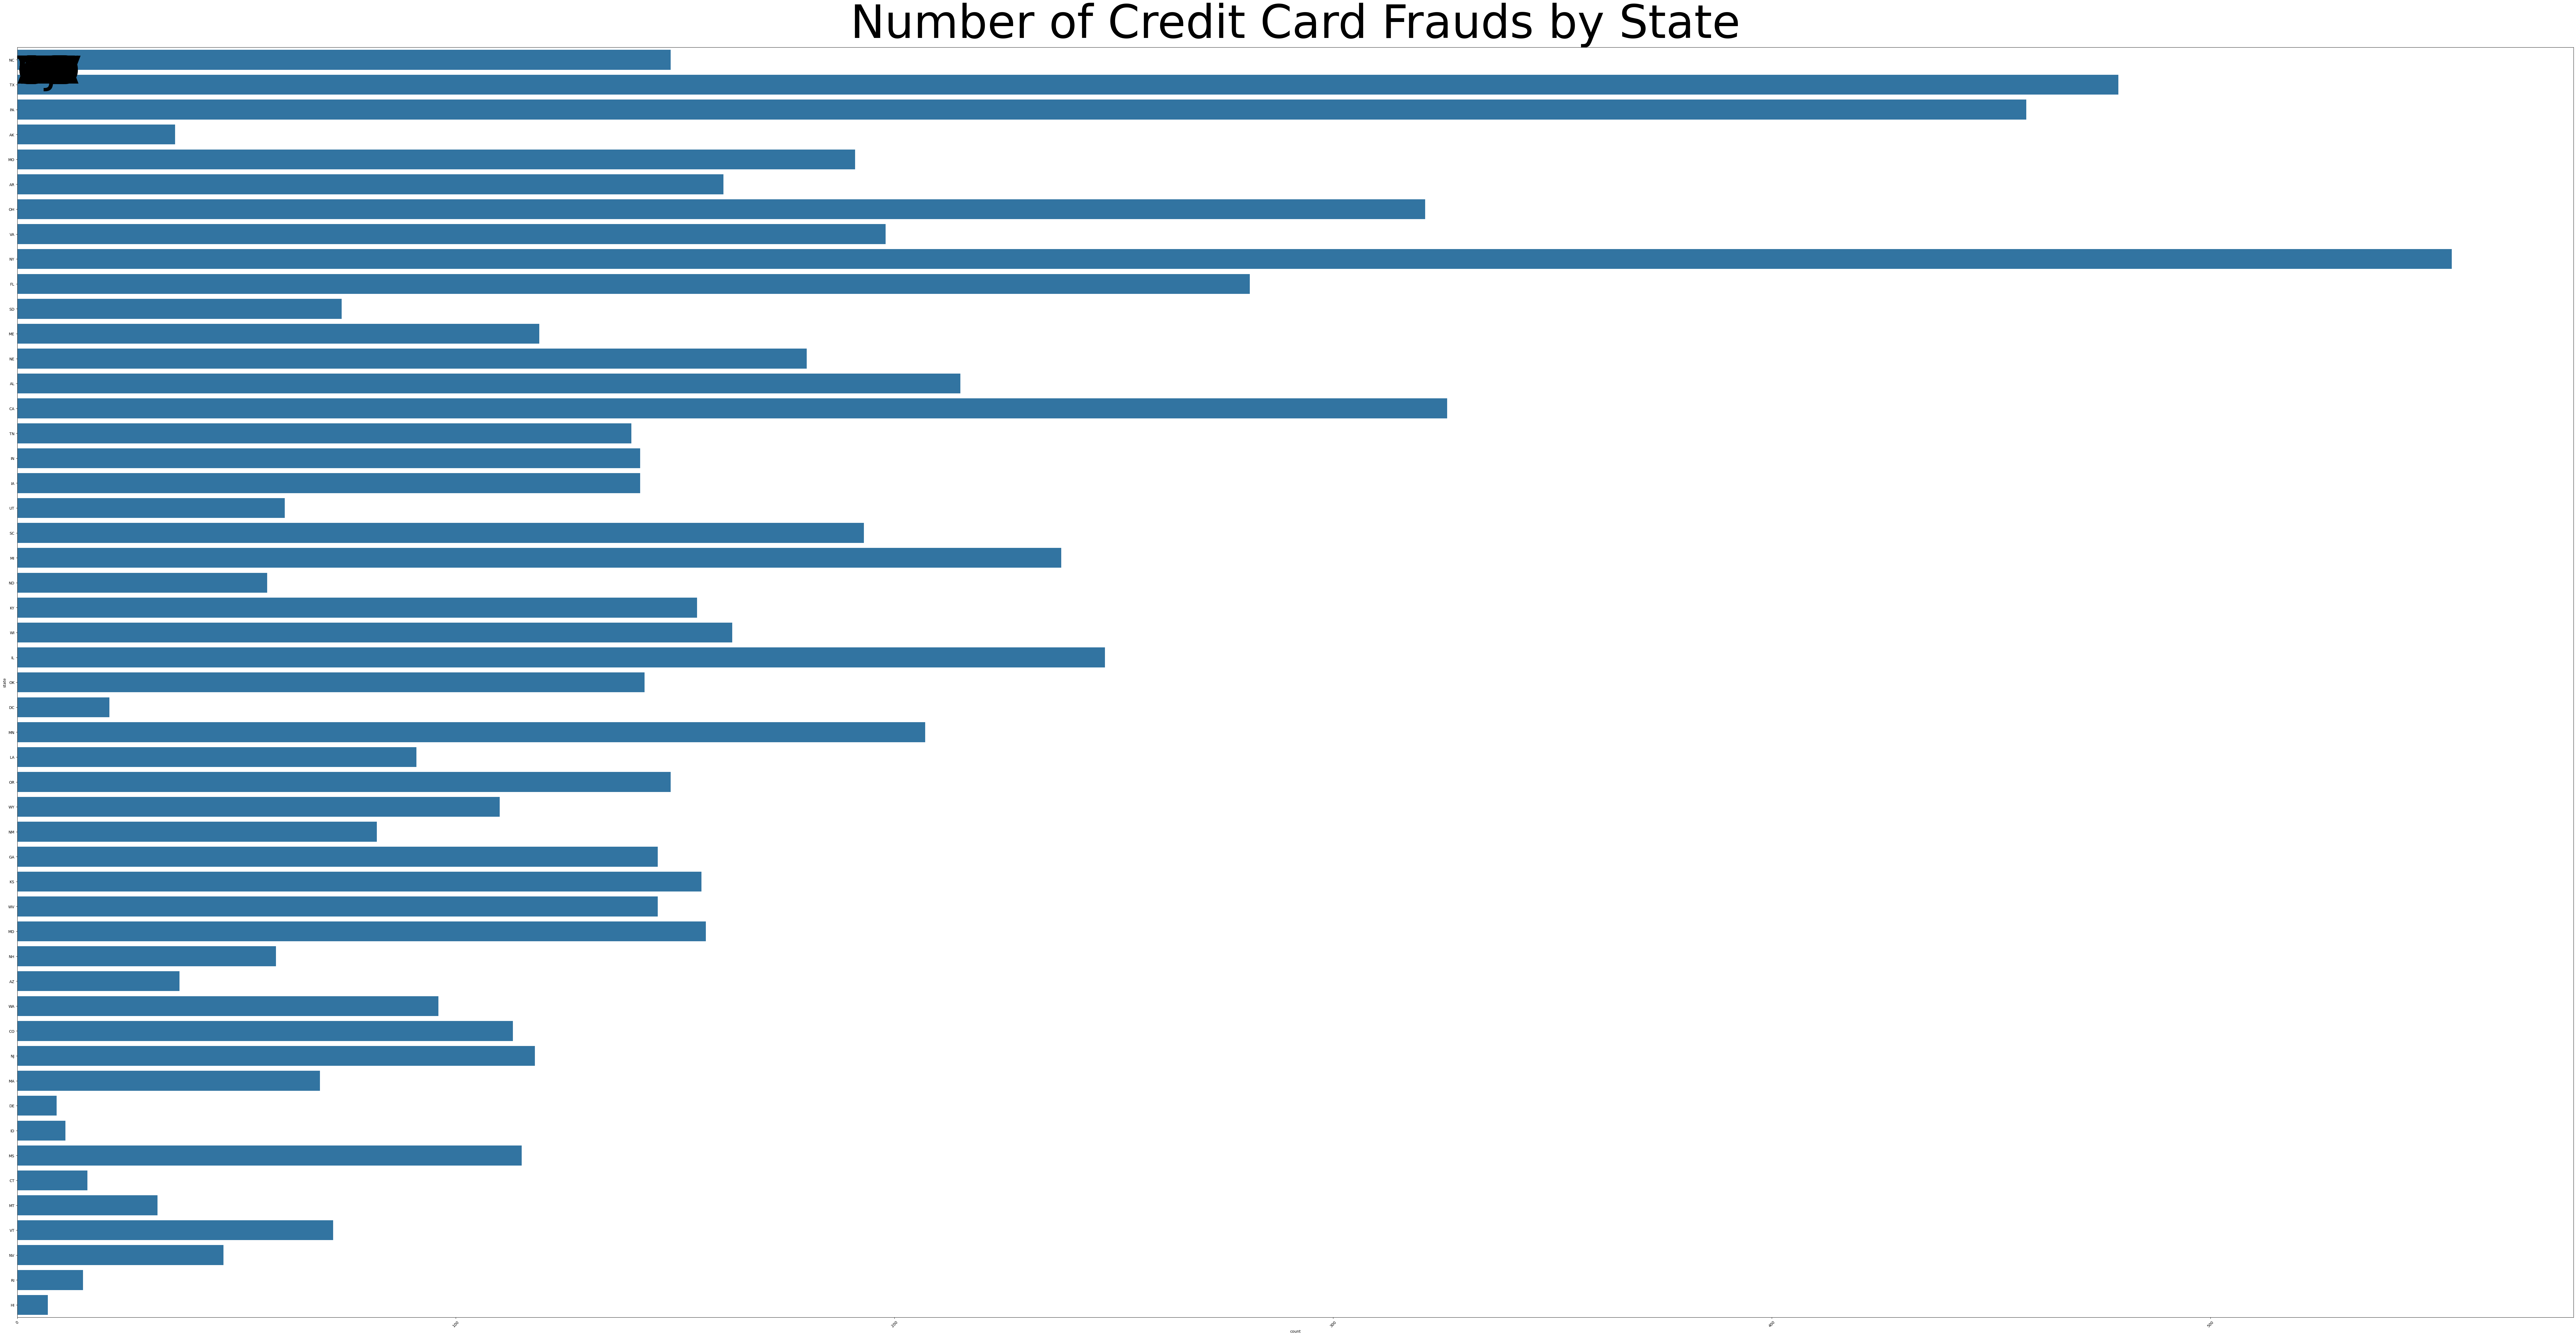

In [45]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 100})
sns.countplot(total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

NC, NY, PA has the most number of reported cases


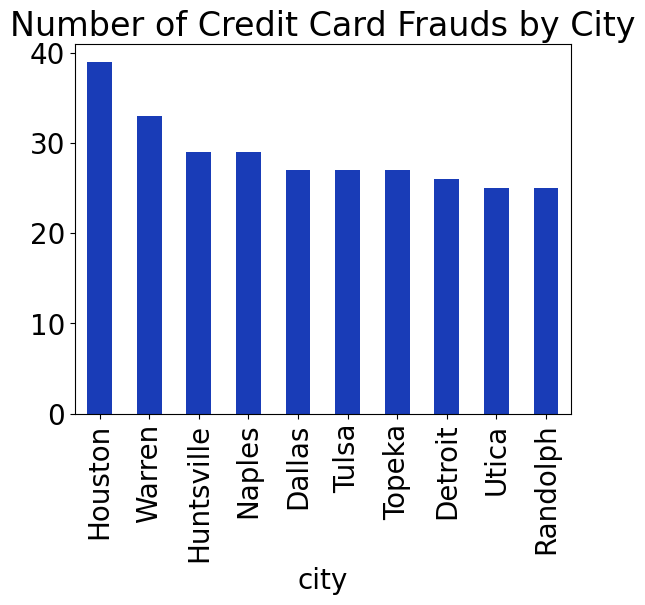

In [46]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

Houston, Warren has most reported frauds

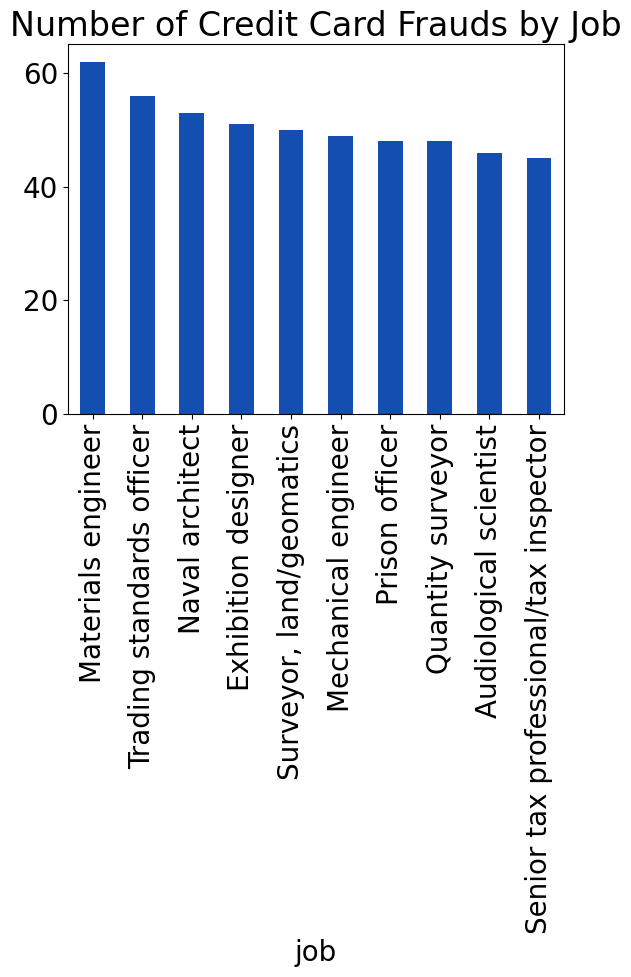

In [47]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

Most frauds occured in jobs of material engineer followed by trading officers and naval architects


**Outlier Analysis**

Outlier analysis shows there are a few outliers in the travel purchase category ranging from around 25k to 30k. With that being said, all purchases are legitimate and don't seem to have a large effect on our analysis.


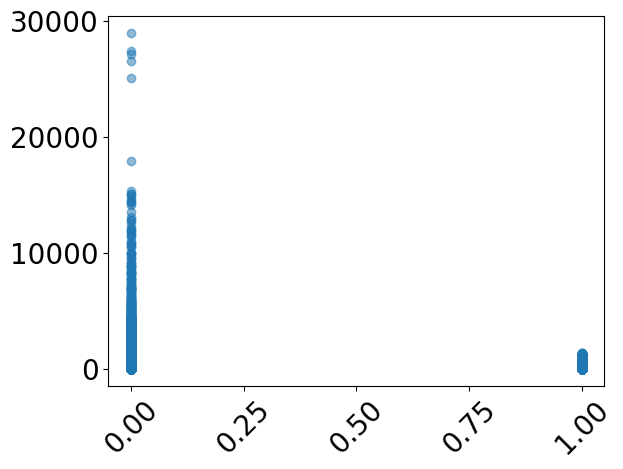

In [48]:
plt.scatter(fraud_train_df['is_fraud'], fraud_train_df['amt'], alpha=0.5)
plt.xticks(rotation=45)
plt.show()

# Algorithm Selection

The Credit Card Transactions Fraud Detection Dataset is used for fraud detection, which is a classification task in machine learning. In this context, the goal is to predict whether a transaction is fraudulent (class 1) or legitimate (class 0) based on features such as transaction amount, merchant, customer information, etc. This is a binary classification problem where the model learns to classify transactions as either fraudulent or legitimate. Support Vector Machine (SVM) models, Decision tree, and Neural Networks are well-suited for fraud detection tasks due to their ability to handle complex patterns, provide insights into important features, prevent overfitting, handle imbalanced data, and are scalable.






# Project Implementation

In [50]:
#Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Sample a smaller subset of the data (10%)
train_df = fraud_train_df.sample(frac=0.1, random_state=42)

- The dataset has been successfully loaded, and a 10% sample has been taken for quicker processing. This subset will be used for initial model development and evaluation.



## Data Preprocessing

Rename columns for better readability and convert columns to appropriate data types. This ensures that the data is in a format suitable for analysis and modeling.



In [7]:
## Data Preprocessing
# Rename columns for readability
train_df.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)


In [8]:
# Convert columns to appropriate data types
train_df["transaction_time"] = pd.to_datetime(train_df["transaction_time"], infer_datetime_format=True)
train_df["dob"] = pd.to_datetime(train_df["dob"], infer_datetime_format=True)
train_df['time'] = train_df['unix_time'].apply(datetime.utcfromtimestamp)
train_df.drop('unix_time', axis=1, inplace=True)
train_df['hour_of_day'] = train_df.time.dt.hour
train_df[['time','hour_of_day']]
train_df.credit_card_number = train_df.credit_card_number.astype('category')
train_df.is_fraud = train_df.is_fraud.astype('category')
train_df.hour_of_day = train_df.hour_of_day.astype('category')

/var/folders/jv/pgx4hk9s061cy27xj9397nbc0000gn/T/ipykernel_47555/875039489.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train_df["transaction_time"] = pd.to_datetime(train_df["transaction_time"], infer_datetime_format=True)
/var/folders/jv/pgx4hk9s061cy27xj9397nbc0000gn/T/ipykernel_47555/875039489.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train_df["dob"] = pd.to_datetime(train_df["dob"], infer_datetime_format=True)


**Results:**

- Columns have been renamed for better readability, making the dataset more understandable.
- Columns have been converted to appropriate data types for analysis. 
- A new column `hour_of_day` has been created, which may provide insights into the time distribution of fraudulent transactions.



## Feature Selection

Select features relevant for the model and apply ordinal encoding to categorical features. This prepares the dataset for training machine learning models.



In [9]:
## Feature Selection
features = ['transaction_id', 'hour_of_day', 'category', 'amount(usd)', 'merchant', 'job']
X = train_df[features].set_index("transaction_id")
y = train_df['is_fraud']

enc = OrdinalEncoder(dtype=np.int64)
enc.fit(X.loc[:, ['category', 'merchant', 'job']])
X.loc[:, ['category', 'merchant', 'job']] = enc.transform(X[['category', 'merchant', 'job']])

## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


**Results:**

- Selected relevant features (`transaction_id`, `hour_of_day`, `category`, `amount(usd)`, `merchant`, `job`) for the model.
- Applied ordinal encoding to categorical features (`category`, `merchant`, `job`), transforming them into numerical values suitable for machine learning algorithms.



In [10]:
## One-Hot Encode Categorical Features
cat_features = ['hour_of_day', 'category', 'merchant', 'job']
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = one_hot_encoder.fit_transform(X_train[cat_features])
X_test_encoded = one_hot_encoder.transform(X_test[cat_features])

# Convert back to DataFrame and add non-categorical features
X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index)

# Include other numerical features
X_train_final = pd.concat([X_train_encoded_df, X_train.drop(columns=cat_features)], axis=1).astype(np.float64)
X_test_final = pd.concat([X_test_encoded_df, X_test.drop(columns=cat_features)], axis=1).astype(np.float64)

# Ensure feature names are strings
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

# Prepare the target variable for ANN
y_train_ann = to_categorical(y_train)
y_test_ann = to_categorical(y_test)

/Users/abhishekbaj/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Results:**

- The dataset has been split into training and testing sets with an 80-20 ratio. 
- Stratified sampling has been used to ensure the target variable distribution is consistent in both sets, which is crucial for imbalanced datasets like fraud detection.
- Categorical features have been one-hot encoded, converting them into a format suitable for machine learning algorithms.
- Combined encoded categorical features with other numerical features to create the final datasets (`X_train_final`, `X_test_final`) for training and testing.
- Prepared the target variable for the Artificial Neural Network (ANN) by converting it to a categorical format.

## Function to Evaluate Models

Define a function to evaluate models and store their performance metrics. This helps in consistently evaluating and comparing different models.



In [11]:
## Dictionary to Store Results
results = {}

## Function to Evaluate Models
def evaluate_model(name, y_true, y_pred):
    results[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

## Model Training and Evaluation (Without Parameter Tuning)

Train and evaluate various machine learning models without parameter tuning. This serves as a baseline to understand the initial performance of the models.


In [12]:
## Model Training and Evaluation

### Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)
evaluate_model('Random Forest', y_test, y_pred_rf)



In [13]:
### Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_final, y_train)
y_pred_log_reg = log_reg.predict(X_test_final)
evaluate_model('Logistic Regression', y_test, y_pred_log_reg)



/Users/abhishekbaj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
### K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_final, y_train)
y_pred_knn = knn_model.predict(X_test_final)
evaluate_model('KNN', y_test, y_pred_knn)



In [15]:
### Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_final, y_train)
y_pred_nb = nb_model.predict(X_test_final)
evaluate_model('Naive Bayes', y_test, y_pred_nb)



In [16]:
### Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_final, y_train)
y_pred_gb = gb_model.predict(X_test_final)
evaluate_model('Gradient Boosting', y_test, y_pred_gb)



In [17]:
### XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_final, y_train)
y_pred_xgb = xgb_model.predict(X_test_final)
evaluate_model('XGBoost', y_test, y_pred_xgb)



In [18]:
### Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train_final.shape[1]))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(units=y_train_ann.shape[1], activation='softmax'))
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_final, y_train_ann, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
y_pred_ann = ann_model.predict(X_test_final)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)
evaluate_model('ANN', y_test, y_pred_ann_classes)

/Users/abhishekbaj/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - accuracy: 0.9763 - loss: 0.2383 - val_accuracy: 0.9947 - val_loss: 0.0262
Epoch 2/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9937 - loss: 0.0338 - val_accuracy: 0.9947 - val_loss: 0.0239
Epoch 3/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 2s 592us/step - accuracy: 0.9938 - loss: 0.0305 - val_accuracy: 0.9947 - val_loss: 0.0256
Epoch 4/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9937 - loss: 0.0291 - val_accuracy: 0.9947 - val_loss: 0.0232
Epoch 5/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9942 - loss: 0.0259 - val_accuracy: 0.9947 - val_loss: 0.0214
Epoch 6/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 2s 576us/step - accuracy: 0.9938 - loss: 0.0235 - val_accuracy: 0.9947 - val_loss: 0.0196
Epoch 7/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step - accuracy: 0.9933 - loss: 0.0239 - val_accuracy: 0.9949 - val_loss: 0.0194
Epoch 8/20
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step - accuracy: 0.9938 -

**Results:**

- Trained and evaluated multiple machine learning models (Random Forest, Logistic Regression, SVM, KNN, Naive Bayes, Gradient Boosting, XGBoost, ANN) without parameter tuning.
- Stored the evaluation metrics (Accuracy, Precision, Recall, F1 Score) for each model.


## Display Results Without Parameter Tuning

Display the evaluation results of models without parameter tuning. This provides a baseline for model performance.


Results Without Parameter Tuning:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.996645   0.996393  0.996645  0.996149
Logistic Regression  0.993869   0.990868  0.993869  0.991574
KNN                  0.995257   0.994742  0.995257  0.994937
Naive Bayes          0.641397   0.989771  0.641397  0.776110
Gradient Boosting    0.996568   0.996225  0.996568  0.996150
XGBoost              0.997378   0.997200  0.997378  0.997228
ANN                  0.994525   0.994555  0.994525  0.992218


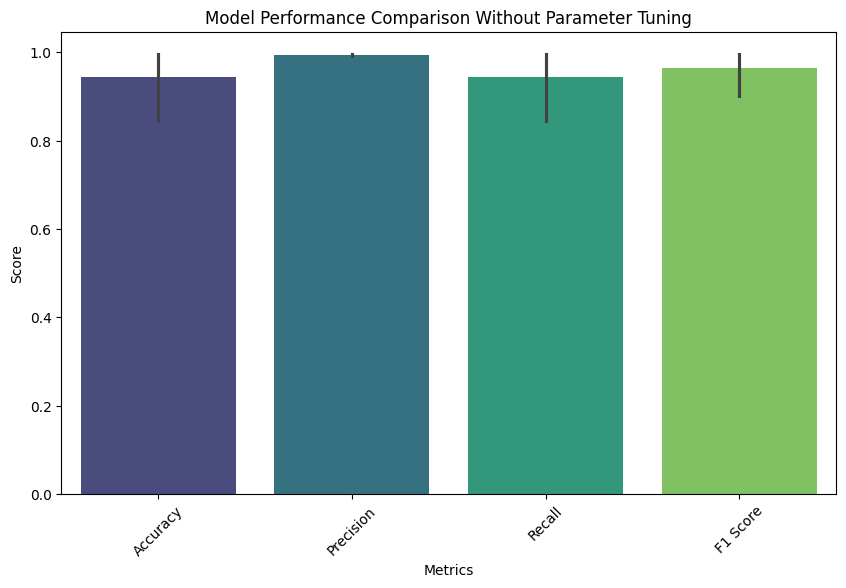

In [19]:

## Display Results Without Parameter Tuning
results_df = pd.DataFrame(results).T
print("Results Without Parameter Tuning:")
print(results_df)

# Visualize Results Without Parameter Tuning
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, palette='viridis')
plt.title('Model Performance Comparison Without Parameter Tuning')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

**Results:**

- Displayed the evaluation metrics (Accuracy, Precision, Recall, F1 Score) for all models trained without parameter tuning.
- This baseline performance will be used to compare against the results after parameter tuning.
- Visualized the performance metrics of all models trained without parameter tuning.
- This visualization provides a quick and clear comparison of the models' baseline performance.


## Model Training and Evaluation (With Parameter Tuning)

Reset the results dictionary and train and evaluate models with parameter tuning. This helps in improving model performance by finding the best hyperparameters.


In [21]:
## Model Training and Evaluation (With Parameter Tuning)

## Reset results dictionary
results = {}

### Random Forest with Parameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', None],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_final, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_final)
evaluate_model('Random Forest Tuned', y_test, y_pred_rf_tuned)



Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  22.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20

In [24]:
### XGBoost with Parameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

xgb_grid_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_distributions=xgb_param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
xgb_grid_search.fit(X_train_final, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test_final)
evaluate_model('XGBoost Tuned', y_test, y_pred_xgb_tuned)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=  18.9s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=  19.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=  19.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=  26.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=  26.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=  26.8s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=  30.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=  31.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=  31.6s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=  32.7s
[CV] END learning_r

**Results:**

- Applied GridSearchCV and RandomizedSearchCV to tune hyperparameters for Random Forest, SVM, and XGBoost models.
- Evaluated the tuned models and stored their performance metrics.
- Hyperparameter tuning helps in finding the best set of parameters that improve the model's performance.


## Display Results With Parameter Tuning

Display the evaluation results of models with parameter tuning. This helps in comparing the improvement in performance after tuning.


Results With Parameter Tuning:
                     Accuracy  Precision    Recall  F1 Score
Random Forest Tuned  0.997339   0.997149  0.997339  0.997138
XGBoost Tuned        0.997417   0.997245  0.997417  0.997274


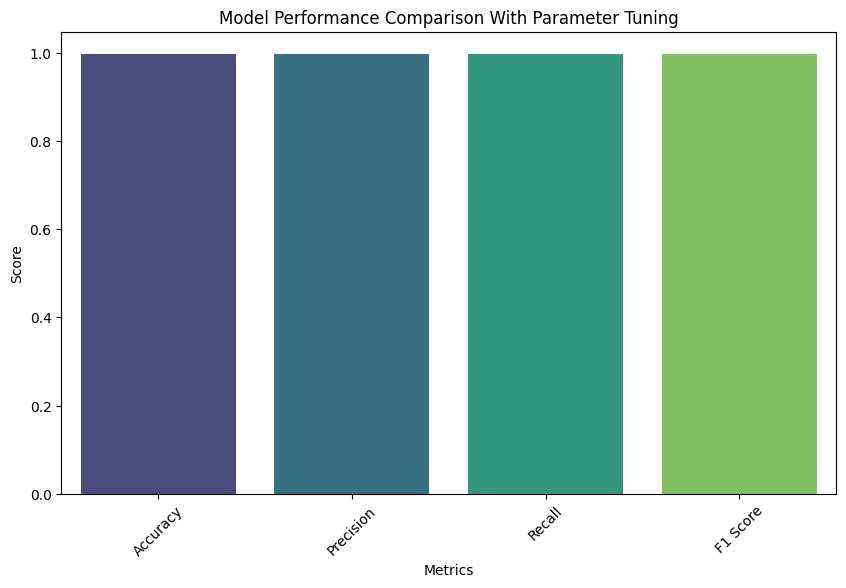

In [30]:
## Display Results With Parameter Tuning
results_df_tuned = pd.DataFrame(results).T
print("Results With Parameter Tuning:")
print(results_df_tuned)

# Visualize Results With Parameter Tuning
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_tuned, palette='viridis')
plt.title('Model Performance Comparison With Parameter Tuning')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()


**Results:**

- Displayed the evaluation metrics (Accuracy, Precision, Recall, F1 Score) for all models trained with parameter tuning.
- This allows us to compare the performance of models before and after tuning.
- Visualized the performance metrics of all models trained with parameter tuning.
- This visualization helps in understanding the impact of hyperparameter tuning on model performance.

## Compare Results

Compare the performance of models before and after parameter tuning. This provides a direct comparison to evaluate the effectiveness of hyperparameter tuning.

Combined Results:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.996645   0.996393  0.996645  0.996149
Logistic Regression  0.993869   0.990868  0.993869  0.991574
KNN                  0.995257   0.994742  0.995257  0.994937
Naive Bayes          0.641397   0.989771  0.641397  0.776110
Gradient Boosting    0.996568   0.996225  0.996568  0.996150
XGBoost              0.997378   0.997200  0.997378  0.997228
ANN                  0.994525   0.994555  0.994525  0.992218
Random Forest Tuned  0.997339   0.997149  0.997339  0.997138
XGBoost Tuned        0.997417   0.997245  0.997417  0.997274


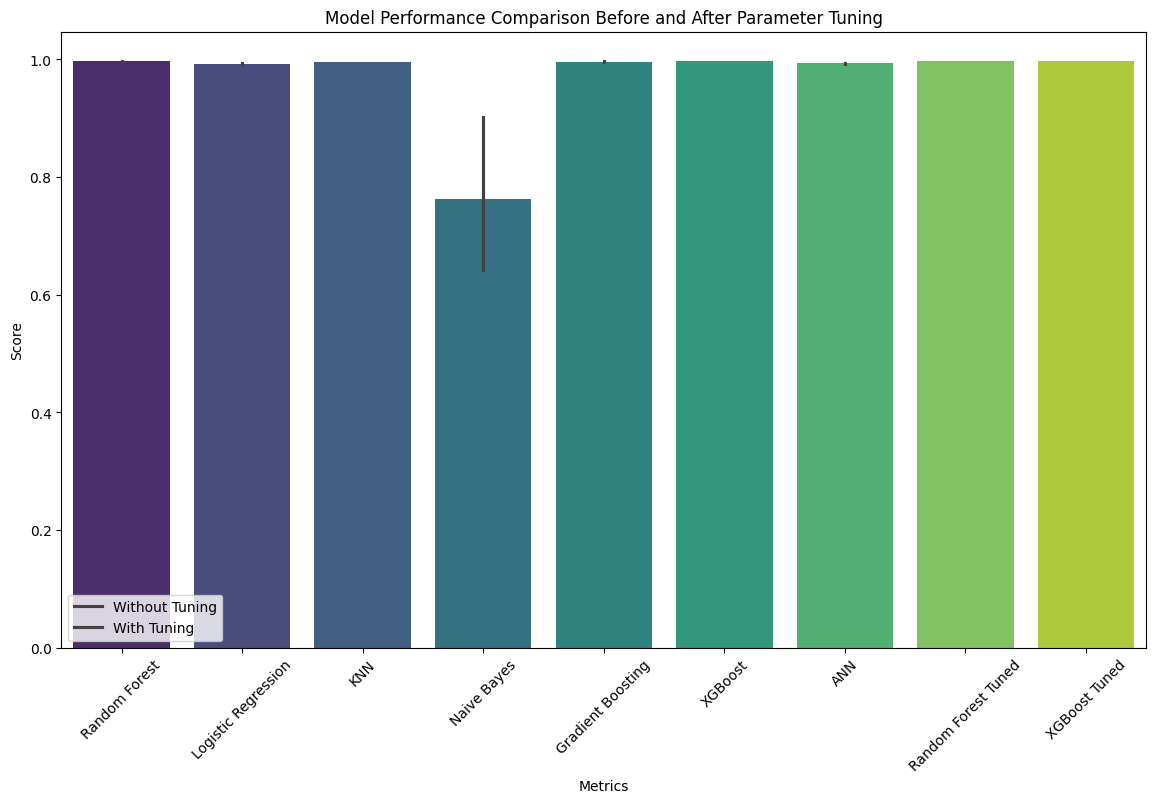

In [33]:
## Compare Results

results_df_filtered = results_df.dropna(how='all')
results_df_tuned_filtered = results_df_tuned.dropna(how='all')
combined_results_df = pd.concat([results_df_filtered, results_df_tuned_filtered])

# Drop rows with all NaN values
combined_results_df = combined_results_df.dropna(how='all')

# Display the combined results
print("Combined Results:")
print(combined_results_df)



# Visualize Combined Results
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_results_df.T, palette='viridis')
plt.title('Model Performance Comparison Before and After Parameter Tuning')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(['Without Tuning', 'With Tuning'])
plt.show()

**Results:**

- Combined the results of models before and after parameter tuning for a direct comparison.
- This combined view helps in understanding the improvements made by hyperparameter tuning.
- Visualized the comparison of model performances before and after parameter tuning.
- This comprehensive visual comparison highlights the improvements in model performance achieved through hyperparameter tuning.